In [3]:
# importa as bibliotecas

import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# função pivot table
def plota_pivot_table(df, value, index, func, y_label, x_label, opcao='nada'):
    
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).plot(figsize=[15, 5])
        
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).unstack().plot(figsize=[15, 5])
        
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    
    return None

In [5]:
# salva o caminho para os diretórios
input_dir = "./input/"
output_dir = "../output/figuras"
# muda de pasta para a input
os.chdir(input_dir)

Arquivos Selecionados: SINASC_RO_2019_JAN.csv
Pasta de destino das imagens: ../output/figuras/2019-01.


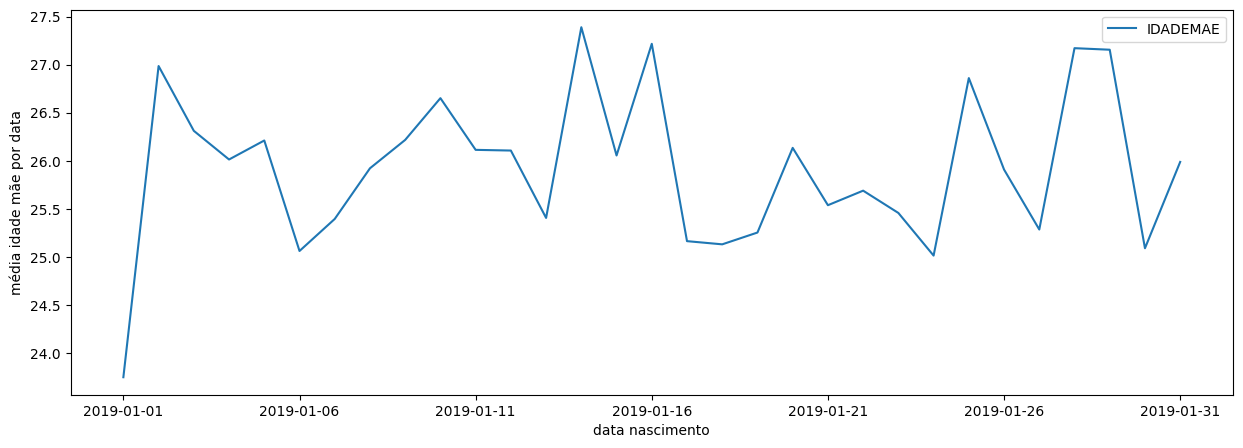

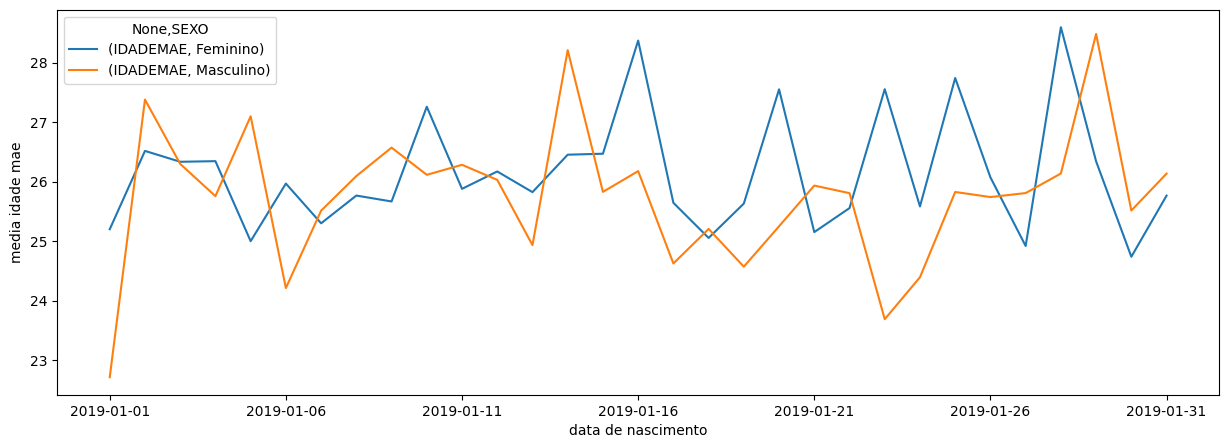

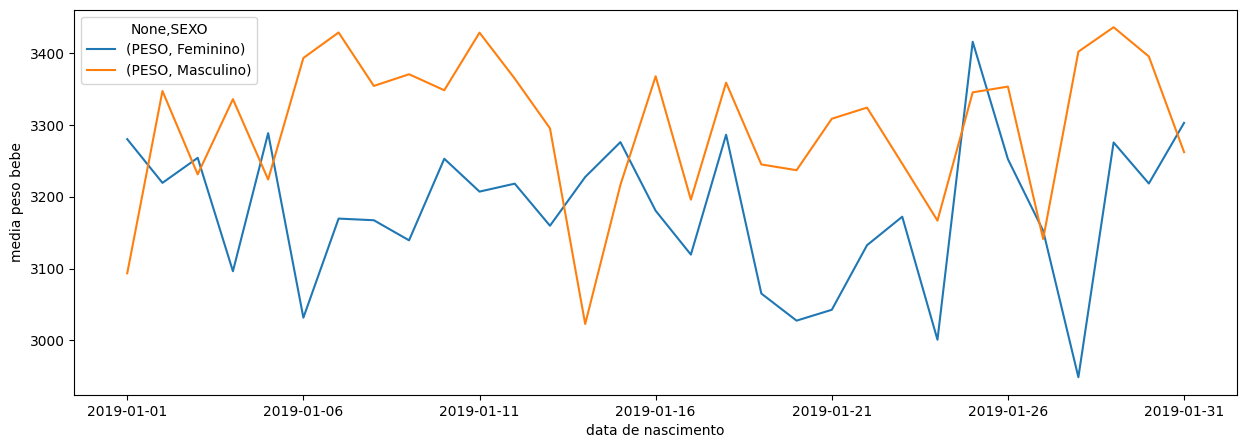

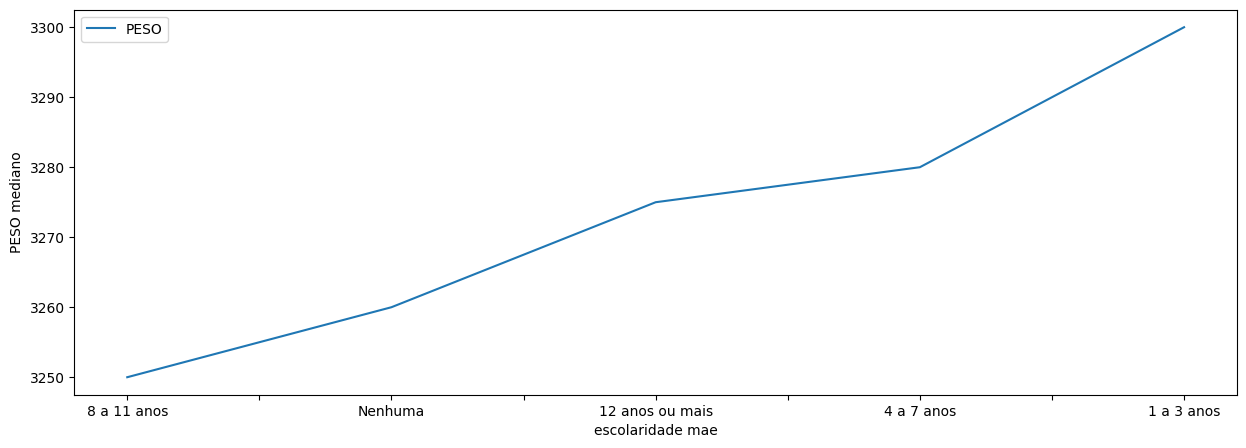

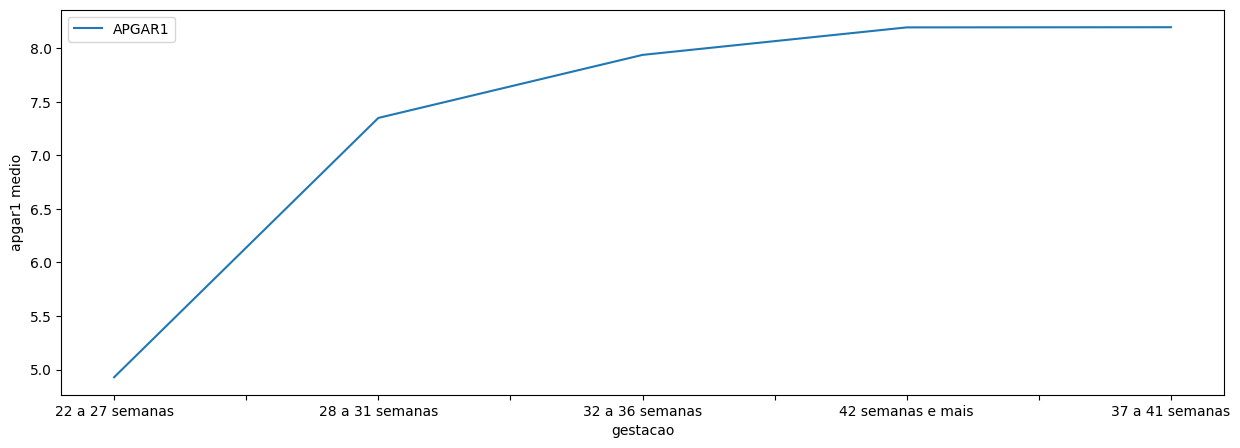

In [7]:
# captura os meses selecionados
months_selected = input("Digite o mês desejado separado por espaços (ex. JAN FEB MAR): ").split(" ")

# captura a lista de arquivos .csv
filenames = [f"SINASC_RO_2019_{month.strip().upper()}.csv" for month in months_selected]

# checa se o arquivo existe
for filename in filenames:
    print(f'Arquivos Selecionados: {filename}')
    if not os.path.exists(filename):
        print(f"Mês inválido ou arquivo não encontrado: {filename}.")
        exit()

# cria um dicionário de meses
months = {'JAN': '01', 'FEV': '02', 'MAR': '03', 'ABR': '04', 'MAI': '05', 'JUN': '06', 'JUL': '07',
          'AGO': '08', 'SET': '09', 'OUT': '10', 'NOV': '11', 'DEZ': '12'}

# abre em pandas os arquivos para os meses selecionados
dfs = [pd.read_csv(filename) for filename in filenames]

# para cada df, isto é, para cada mês
# gera as imagens necessárias e salva na pasta do mês referente
for df in dfs:
    # salva a data máxima do dataset no formato string
    data_maxima = str(df['DTNASC'].max())
    # remove o dia da data
    data_maxima = data_maxima[:-3]
    # cria uma pasta output para as figuras
    os.makedirs('../output/figuras/'+data_maxima, exist_ok=True)
    output_dir = ('../output/figuras/'+data_maxima)
    print(f'Pasta de destino das imagens: {output_dir}.')

    # plota as imagens pedidas no exemplo
    plota_pivot_table(df, 'IDADEMAE', 'DTNASC', 'mean', 'média idade mãe por data', 'data nascimento')
    plt.savefig(os.path.join(output_dir, 'media idade mae por data.png'))

    plota_pivot_table(df, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
    plt.savefig(os.path.join(output_dir, 'media idade mae por sexo.png'))

    plota_pivot_table(df, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
    plt.savefig(os.path.join(output_dir, 'media peso bebe por sexo.png'))

    plota_pivot_table(df, 'PESO', 'ESCMAE', 'median', 'PESO mediano','escolaridade mae','sort')
    plt.savefig(os.path.join(output_dir, 'PESO mediano por escolaridade mae.png'))

    plota_pivot_table(df, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
    plt.savefig(os.path.join(output_dir, 'media apgar1 por gestacao.png'))


# retorna para pasta original
os.chdir('..')